# Сборный проект № 1. Исследовательская работа для интернет-магазина «Стримчик».

В данном исследовании мне предстоит ознакомиться с историческими данными из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне необходимо будет выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Мне предоставлены данные до 2016 года и с помощью них необходимо помочь спланировать кампанию на 2017 год.

Хочется выделить ключевые этапы моего исследования:

- Шаг 1. Загрузка данных и ознакомление с ними. Данные мы будем загружать из csv-файла */datasets/games.csv*
- Шаг 2. Обработка данных. (форматирование, обработка пропусков, создание доп. полей для исследования)
- Шаг 3. Проведение исследовательноского анализа данных
- Шаг 4. Создание портретов пользователей для каждого региона
- Шаг 5. Проверка гипотез.
- Шаг 6. Общий вывод

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


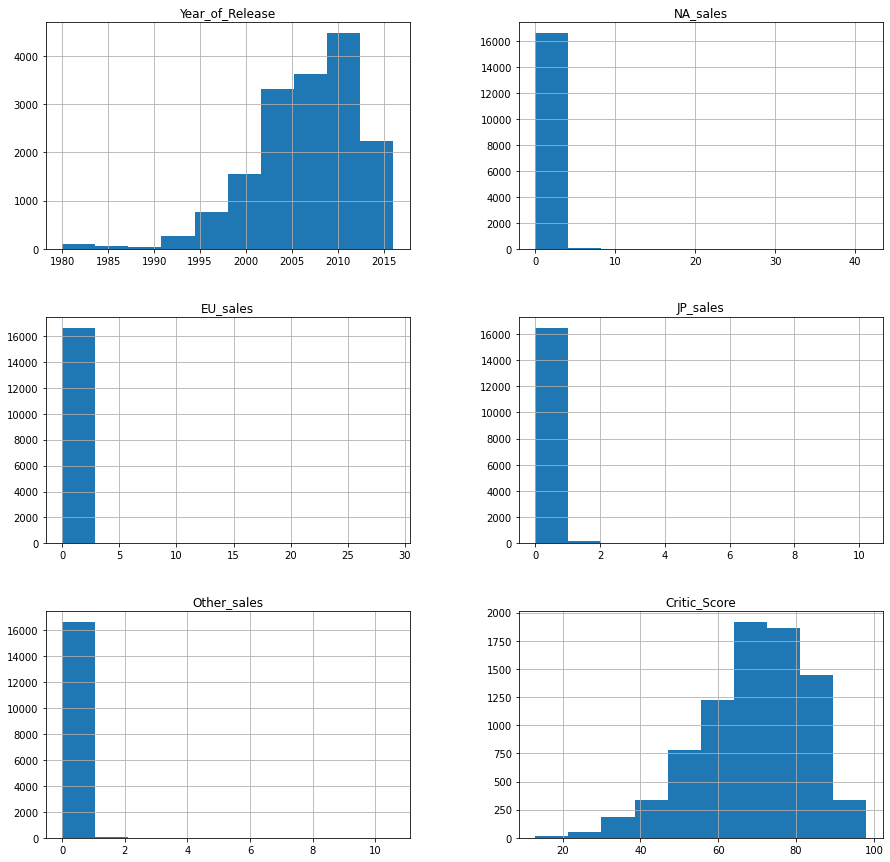

In [6]:
data.hist(figsize = (15, 15))
plt.show()

По итогам знакомства с данными хочется сразу наметить план работы по их предообработке.
1) Начнем с переименования столбцов. Приведу их к общему виду

2) Сменим формат столбца "Year" с float на int. 

3) Столбец "User_Score" почему-то имеет тип object. Сменим на float.

4) Столбец "Critic_Score" имеет в свое наборе только целочисленные элементы. Необходимо преобразовать в int
 

Сразу проверим данные на кол-во пропусков.

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
Critic_Score,51.000000
User_Score,40.000000
Rating,40.000000
Year_of_Release,2.000000
Name,0.000000
Platform,0.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


In [8]:
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

В датафреме имеются пропуски. Сразу хочется обратить внимание на два пропуска в столбцах Name и Genre. Странные пропуски, скорее всего придеться удалить. Помимо этого, большое кол-во пропусков имеют столбцы: Critic_Score, User_Score и Rating. Более детально проверим их на следующем шаге.

## Подготовка данных

### Переименование столбцов

In [9]:
data.columns = map(str.lower, data.columns)

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

Преобразуем тип данных для столбца year_of_release, т.к. год не может иметь дробную часть. Поэтому тип данных float в данном случае избыточен и может привести к неточностям в данных. Но прежде всего нам необходимо избавиться от пропусков

In [11]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data.drop(data[data['year_of_release'].isna()].index, inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


TBD — это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено»). На мой взгляд логично избавиться от этих значений и сделать их NaN, чтобы стало возможно преобразовать поле user_score в необходимый тип данных.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

Приведем поле critic_score к целочисленному типу данных

In [14]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


Пункт с преобразование значений к нужному виду можно считать выполненым.

### Работа с пропусками

Решил удалить строки, где отсутсвует год выпуска, т.к. их не так много и подобные строки не пригодятся в аналитике. Из-за небольшого кол-ва пропусков можно предположить, что причиной пропусков в данном поле является человеческий фактор.

In [16]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Выглядят, как поврежденные строки. Удалим

In [17]:
data.drop(data[data['genre'].isna()].index, inplace=True)

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Так как поля critic_score и user_score являются в нащем случае числовыми, думаю, что не стоит обрабатывать пропуски, т.к. это может отразиться на результатах исследования. 

Хочу обратить внимание на поле rating. В данной таблице оно имеет тип данных object. Я думаю, что допустимо будет заменить значения NaN в данном поле на какое-то текстовое значение, которое будет озночать, что rating неизвестен. 

In [19]:
data['rating'] = data['rating'].fillna('Not_found')

In [20]:
data['rating'].value_counts()

Not_found    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

### Проверка на наличие явных дубликатов

In [21]:
data.duplicated().sum()

0

В нашей таблице не обнаружено явных дубликатов

Предлагаю проверить кол-во повтороний значений в полях name, platform, year_of_release, чтобы убедиться, что у нас точно нет дубликатов по играм

In [22]:
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Судя по всему, нашелся один дубликат. Проверим

In [23]:
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Действительно, обнаружился один дубликат основной строчки. Это можно понять по кол-ву продаж. У той строчки, что их больше, является основной.

Ее можно спокойно удалить, т.к. никакой статической значимости ее данные не несут.

In [24]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

### Суммарные продажи во всех регионах

In [25]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Not_found,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Not_found,31.38


Готово. Данное поле пригодится в исследовании данных.

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?

In [27]:
games_sales = data.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns={'name':'Кол-во проданных игр (млн.)'}, level=0)
games_sales.index = games_sales.index.rename('Год')
games_sales.head(10)

,Кол-во проданных игр (млн.)
Год,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


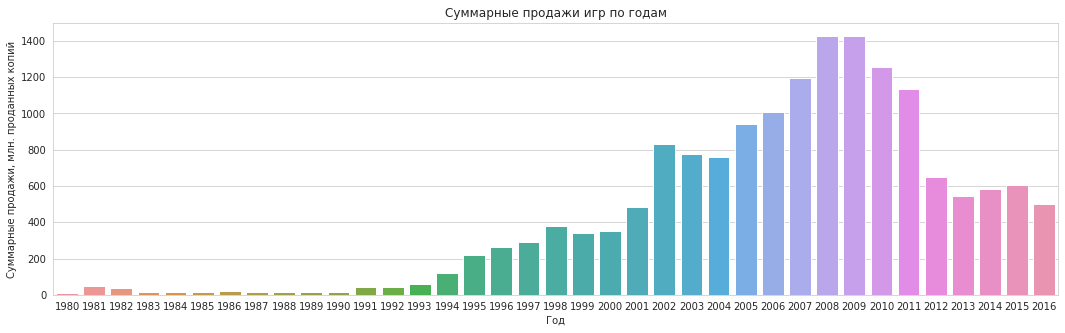

In [28]:
games_sales = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data=data, x='year_of_release')
plt.title('Суммарные продажи игр по годам')
plt.ylabel('Суммарные продажи, млн. проданных копий')
plt.xlabel('Год')
plt.show()

В целом, для ответа на данный вопрос достаточно быть знакомым с историей игровой индустрии. Но всегда хорошо, когда факты подрепляются цифрами.

Как видно на графике, что заметный и сильный рост кол-ва вышедших игр начался после 2000-х годов. До 90-х годов игры были чем-то нисшевым и рынок только набирал обороты. В основном, играми занимались энтузиасты и те, кто мог себе это позволить. В 90-х годах свое развитие получил консольный гейминг. Приставки стали желанным подарком для детей и подростков со всех уголков планеты и рынок начал ощущать потребность в новых играх. 2000-е года - это годы резкого технологического скачка. Персональные компьютеры стали доступнее и востребованнее. И конечно же это поспособствовало развитию игровой индустрии. Теперь это была не нисшевая отрасль, а очень переспективное направление. В игровой индустрии начало появляться все больше круных игроков и инвестиций. 

Но помимо небывалого роста игровая индустрия сталкивалась и с резкими падениями. Экономический кризис в начале 10-х годов заметно сказался на кол-ве вышедших игр. Помимо этого, большое кол-во игры стали превращаться в долгострои из-за развитя подхода к разработке игр. Чтобы удивлять игроков, необходимо было более комплексно подходить к процессу их создания и проработки.

Поэтому, можно смело сказать, что данные за все периоды не важны. До 1992 года игровая индустрия была совсем другой и только начинала свое развитие.

###  Как менялись продажи по платформам?

In [29]:
platform_pivot_table = data.pivot_table(index = ['platform'], values = 'sales_sum', aggfunc = 'sum')
platform_pivot_table.columns = ['sales_sum']
platform_pivot_table = platform_pivot_table.sort_values('sales_sum', ascending = False)
platform_pivot_table.head(20)

,sales_sum
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем 10 платформ с самыми высокими продажами

In [30]:
best_platform = list(platform_pivot_table.index[:10])
best_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [31]:
for platform in best_platform:
    print('Платформа', platform)
    platform_for_year_pivot_table = data.query('platform == @platform').pivot_table(
        index=['platform','year_of_release'],
        values='sales_sum',
        aggfunc='sum')
    print(platform_for_year_pivot_table)
    print()

Платформа PS2
                          sales_sum
platform year_of_release           
PS2      2000                 39.17
         2001                166.43
         2002                205.38
         2003                184.31
         2004                211.81
         2005                160.66
         2006                103.42
         2007                 75.99
         2008                 53.90
         2009                 26.40
         2010                  5.64
         2011                  0.45

Платформа X360
                          sales_sum
platform year_of_release           
X360     2005                  8.25
         2006                 51.62
         2007                 95.41
         2008                135.26
         2009                120.29
         2010                170.03
         2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.9

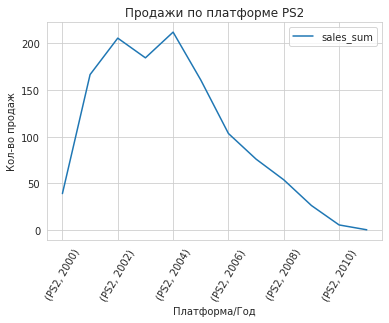

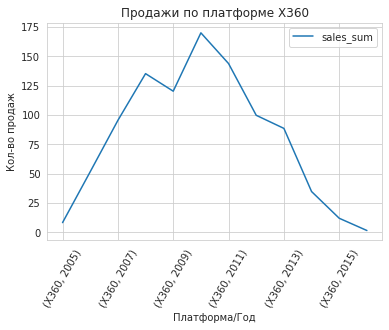

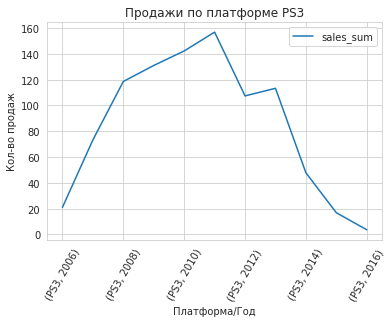

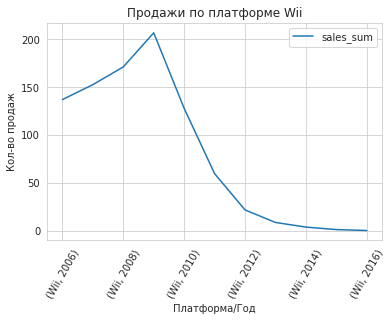

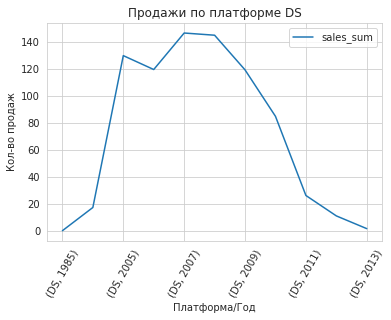

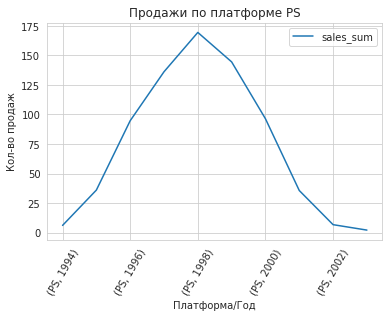

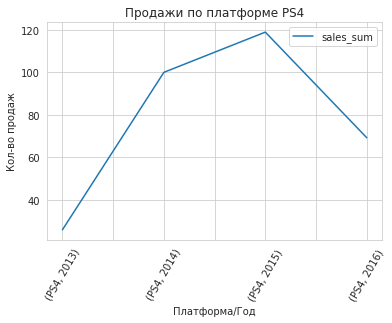

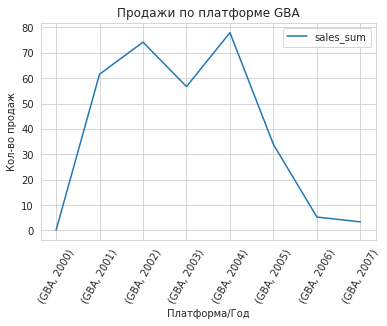

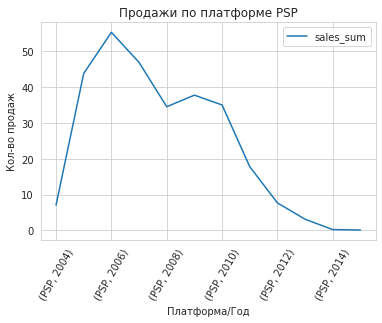

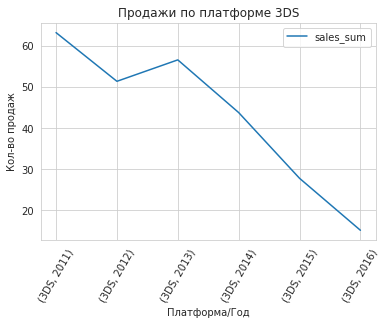

In [32]:
for platform in best_platform:
    platform_for_year_pivot_table = data.query('platform == @platform').pivot_table(
    index=['platform','year_of_release'],
    values='sales_sum',
    aggfunc='sum')
    platform_for_year_pivot_table.plot()
    plt.xticks(rotation = 60)
    plt.title(f'Продажи по платформе {platform}')  # Изменение здесь
    plt.xlabel('Платформа/Год')
    plt.ylabel('Кол-во продаж')

Для ответа на данный вопрос рассмотрим платформы, которые имют большее кол-во проданных игр в мире. 

Посмотрев на данные, мы можем сделать вывод, что платформы имеют пик своей актуальности первые 5-6 лет после их выпуска. 

Данные вывод можно сдеалать исходя из динамики кол-ва продаж в год.

После данного периоды кол-во продаж начинает идти на спад, но консоль еще какое-то время остается востребованной и на нее продолжают выходить игры. Этот промежуток может составлять от 2-х до 5-и лет, судя по нашим данным.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, все верно. Здесь еще можно построить тепловую карту
</div>

### Возьмите данные за соответствующий актуальный период

Я думаю, стоит рассматривать данные после 2010 года. Это период, который показывает актуальное состояние игровой индустрии на сегодняшиний момент. До 2000-х годов, продажи и кол-ва игр не соответсвтуют ненешим меркам, а до 2010 года - высочайший пик продаж, который на данный момент может дать неправильное представление о нынешней картине в игровой индустрии.

### Не учитывайте в работе данные за предыдущие годы.

Создадим необходимый датафрейм из начального.

In [33]:
actual_data = data[data['year_of_release'] > 2013]

In [34]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  sales_sum        1689 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 173.2+ KB


### Какие платформы лидируют по продажам, растут или падают? 

In [35]:
actual_best_platform_pivot_table = actual_data.pivot_table(index = ['platform'], values = 'sales_sum', aggfunc = 'sum')
actual_best_platform_pivot_table.columns = ['sales_sum']
actual_best_platform_pivot_table = actual_best_platform_pivot_table.sort_values('sales_sum', ascending = False)
actual_best_platform_pivot_table

,sales_sum
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [36]:
best_actual_platform = list(actual_best_platform_pivot_table.index[:10])
best_actual_platform

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

In [37]:
for platform in best_actual_platform:
    print('Платформа', platform)
    platform_for_year_pivot_table = actual_data.query('platform == @platform').pivot_table(
        index=['platform','year_of_release'],
        values='sales_sum',
        aggfunc='sum')
    print(platform_for_year_pivot_table)
    print()

Платформа PS4
                          sales_sum
platform year_of_release           
PS4      2014                100.00
         2015                118.90
         2016                 69.25

Платформа XOne
                          sales_sum
platform year_of_release           
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

Платформа 3DS
                          sales_sum
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14

Платформа PS3
                          sales_sum
platform year_of_release           
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60

Платформа X360
                          sales_sum
platform year_of_release           
X360     2014                 34.74
         2015                 11.96
         2016                  1.52

Платформа WiiU
        

Судя по приведенным выше данным можно сделать следующие выводы:

- Платформы PS3, XBOX 360 уже переживают спад своей востребованности. Им на смену приходит новое поколение консолей.

- Платформы PS4 и XBOX One на данным момент являются флагманами игровой индустрии и еще не пережили пик своей популярности. Судя, по предыдущим данным он предстоит им в 2017-2018 году. 

- Консоли DS и Wii совершенное потеряли свою актуальность и являются невостребованными. Стоит обратить внимание на продажи PSV и 3DS. Они еще ближайшие 2-3 года могут иметь актуальность и игры на данных консолях могут набирать удобоваримый уровень продаж за год.

- PC, как платформа для игр имеет достаточно сдержанные продажи. Наблюдается небольшой спад продаж. Но она не будет терять свою аткуальность, т.к. технологии в мире PC-гейминга не отстают от консолей.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [38]:
data_top_10_platfrom = actual_data[actual_data['platform'].isin(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS'])]

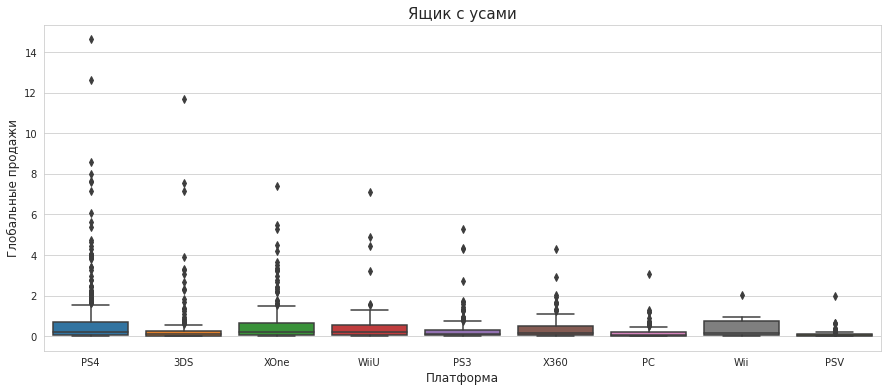

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data_top_10_platfrom, x='platform', y='sales_sum')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Построим график с меньшим кол-вом разброс для наглядности. 

In [40]:
data_top_10_platfrom =  actual_data[actual_data['sales_sum'] < 1.2]

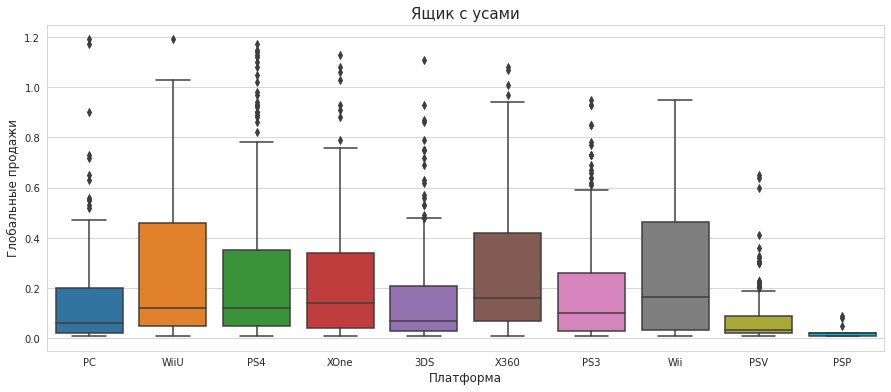

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data_top_10_platfrom, x='platform', y='sales_sum')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Судя по данному графику мы можем сделать вывод, что продажи игр в нашем случае обладают большим количеством выбросов. В выборке пришлось ограничить их кол-во для лучшей наглядности.

Видно, что у консолей старого и нового поколения(PS3-XBOX 360 и PS4-XBOX One, например) медианы практически равны

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [42]:
ps4_info = actual_data.query('platform == "PS4"').loc[:, ['sales_sum', 'critic_score', 'user_score']]
ps4_info.head()

,sales_sum,critic_score,user_score
31,14.63,<NA>,NaN
42,12.62,97,8.3
77,8.58,82,4.3
87,7.98,<NA>,NaN
92,7.66,83,5.7


In [43]:
ps4_info.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


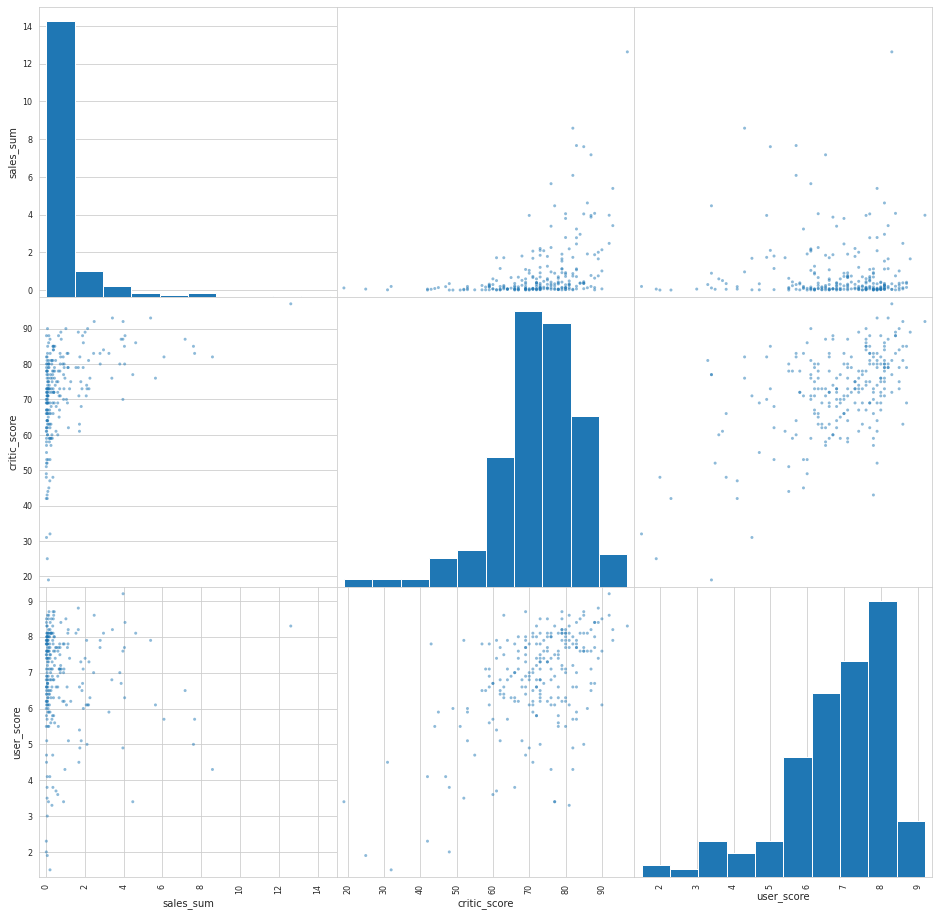

In [44]:
pd.plotting.scatter_matrix(ps4_info, figsize = (16, 16))
plt.show()

По полученным данным можно проследить достаточно значимую зависимость между отзывами игроков и отзывами критиков. Значит, что мнение игроков и критиков об играх на данной платформ может совпадать. Менее значимая зависимость видна между отзывами критиков и общей суммой продаж. Это может означать, что игры, которые хорошо оценили критики могут иметь хорошие продажи и наооборот. Корреляция между отзывами игроков и общими продажами слишком мала, ее можно не рассматривать.

### Соотнесите выводы с продажами игр на других платформах.

In [45]:
xbox_one_info = actual_data.query('platform == "XOne"').loc[:, ['sales_sum', 'critic_score', 'user_score']]
xbox_one_info.head()

,sales_sum,critic_score,user_score
99,7.39,<NA>,NaN
165,5.47,97,7.9
179,5.26,81,5.4
242,4.49,84,6.4
270,4.22,88,6.2


In [46]:
xbox_one_info.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


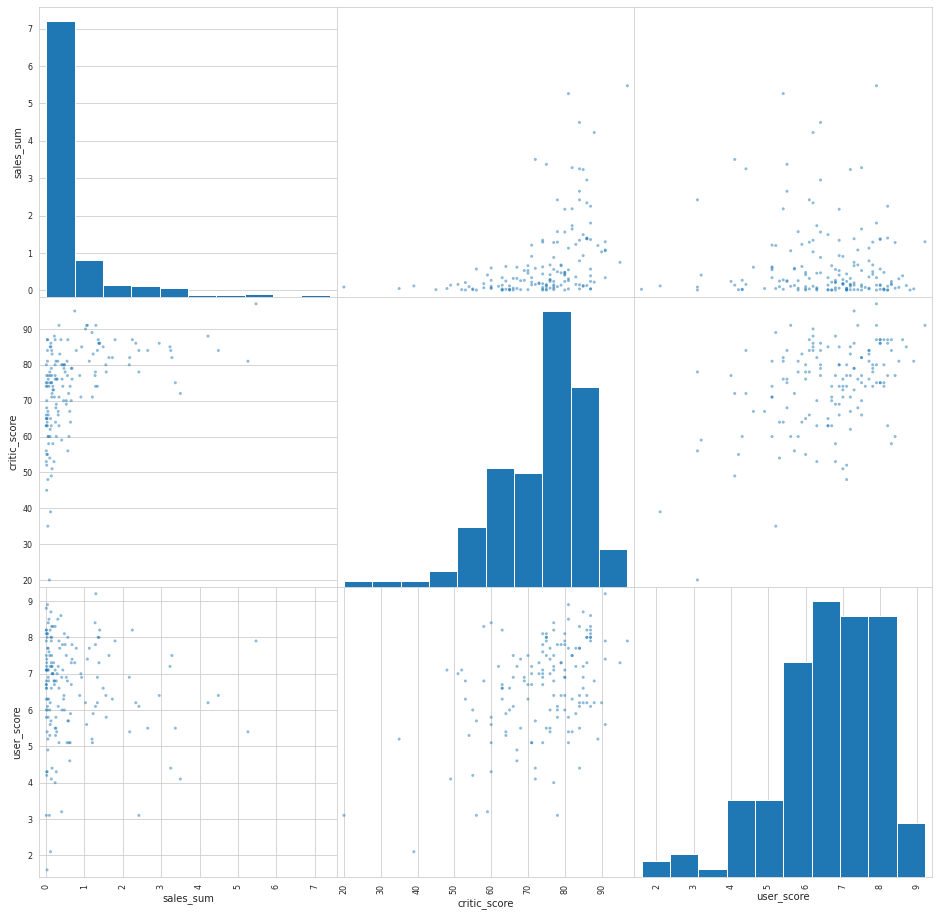

In [47]:
pd.plotting.scatter_matrix(xbox_one_info, figsize = (16, 16))
plt.show()

In [48]:
ps3_info = actual_data.query('platform == "PS3"').loc[:, ['sales_sum', 'critic_score', 'user_score']]
ps3_info.head()

,sales_sum,critic_score,user_score
180,5.27,<NA>,NaN
255,4.36,<NA>,4.8
264,4.28,<NA>,4.5
552,2.70,<NA>,3.2
1021,1.74,<NA>,5.1


In [49]:
ps3_info.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


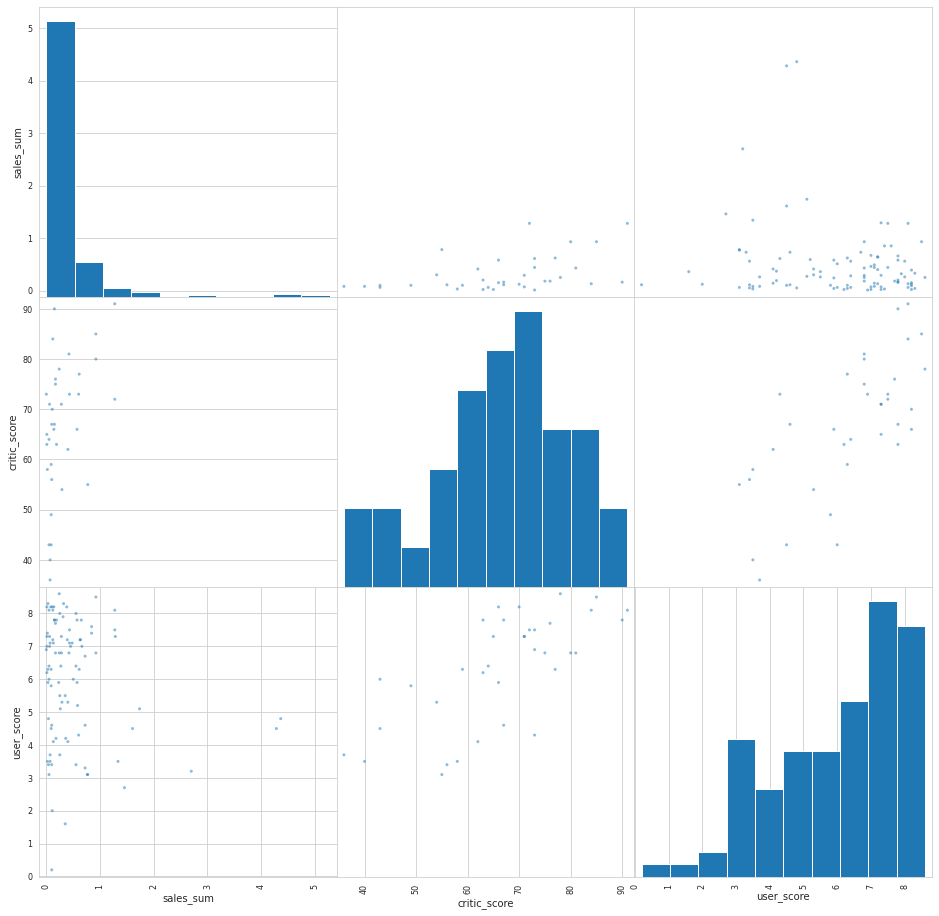

In [50]:
pd.plotting.scatter_matrix(ps3_info, figsize = (16, 16))
plt.show()

In [51]:
xbox_360_info = actual_data.query('platform == "X360"').loc[:, ['sales_sum', 'critic_score', 'user_score']]
xbox_360_info.head()

,sales_sum,critic_score,user_score
263,4.28,<NA>,4.9
494,2.92,<NA>,4.2
829,2.05,<NA>,5.5
898,1.92,<NA>,4.7
1049,1.70,<NA>,NaN


In [52]:
xbox_360_info.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


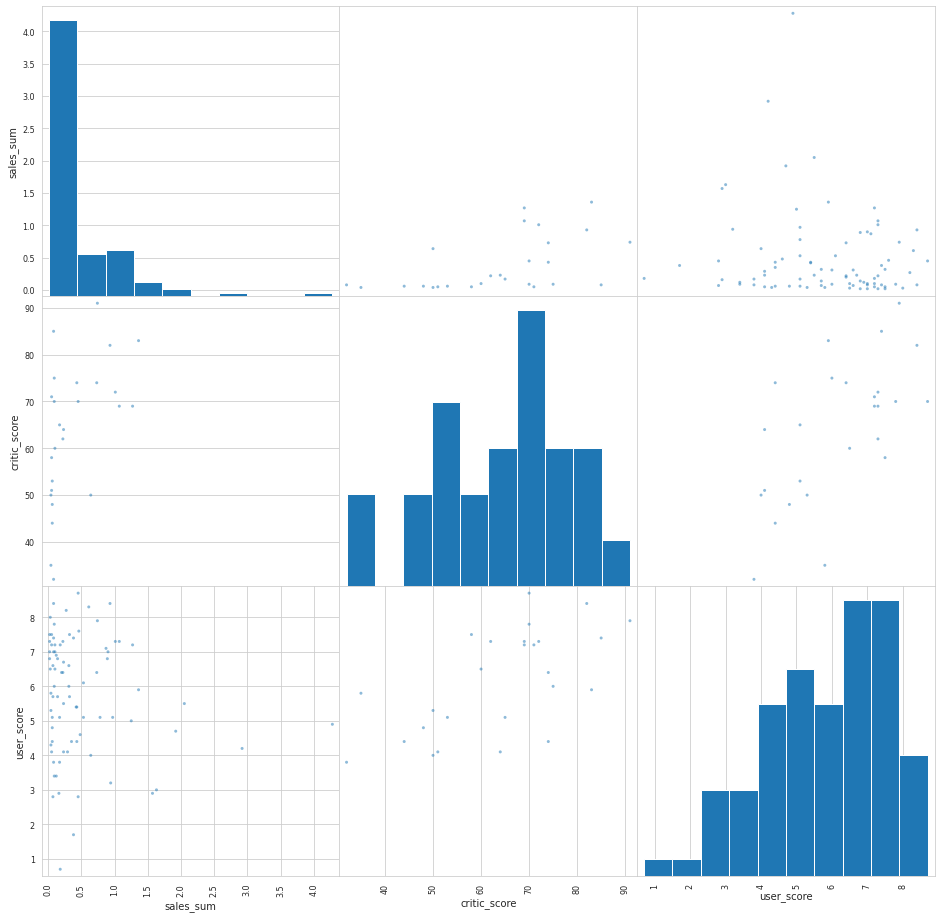

In [53]:
pd.plotting.scatter_matrix(xbox_360_info, figsize = (16, 16))
plt.show()

In [54]:
_3ds_info = actual_data.query('platform == "3DS"').loc[:, ['sales_sum', 'critic_score', 'user_score']]
_3ds_info.head()

,sales_sum,critic_score,user_score
47,11.68,<NA>,NaN
96,7.55,<NA>,NaN
108,7.14,<NA>,NaN
312,3.89,86,8.7
406,3.32,<NA>,NaN


In [55]:
_3ds_info.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


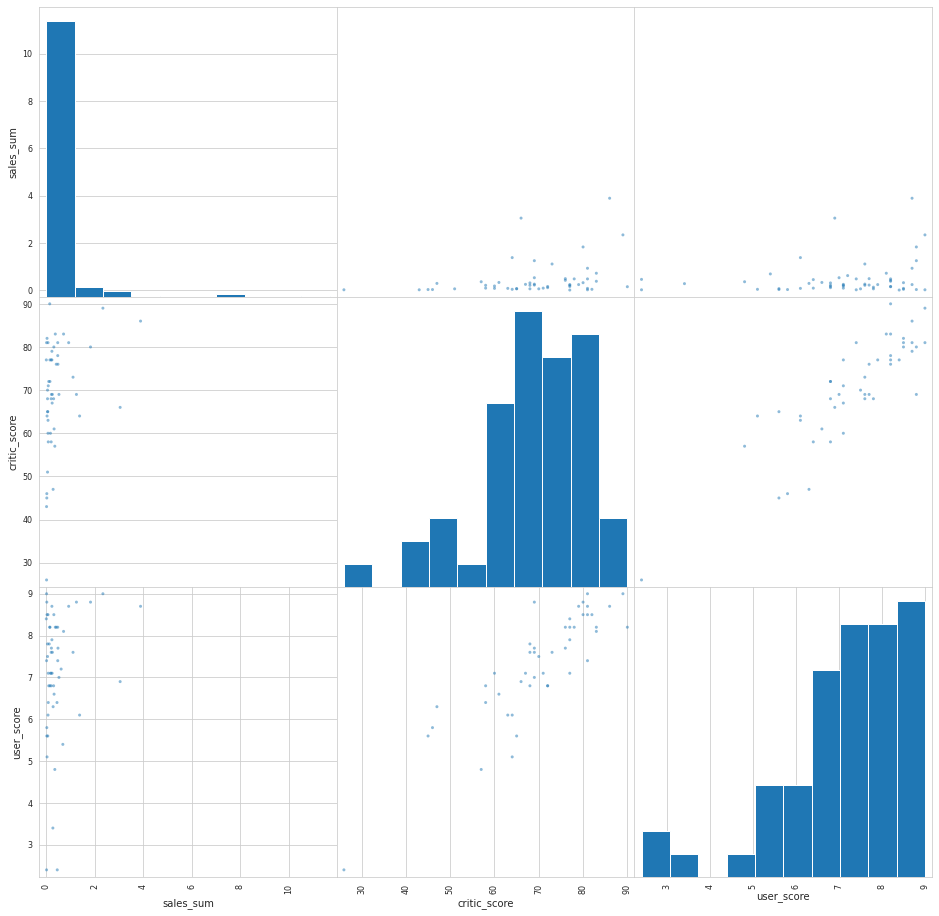

In [56]:
pd.plotting.scatter_matrix(_3ds_info, figsize = (16, 16))
plt.show()

In [57]:
wii_u_info = actual_data.query('platform == "WiiU"').loc[:, ['sales_sum', 'critic_score', 'user_score']]
wii_u_info.head()

,sales_sum,critic_score,user_score
110,7.09,88,9.1
216,4.87,<NA>,NaN
247,4.44,81,8.5
424,3.21,88,8.7
1174,1.58,66,6.5


In [58]:
wii_u_info.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


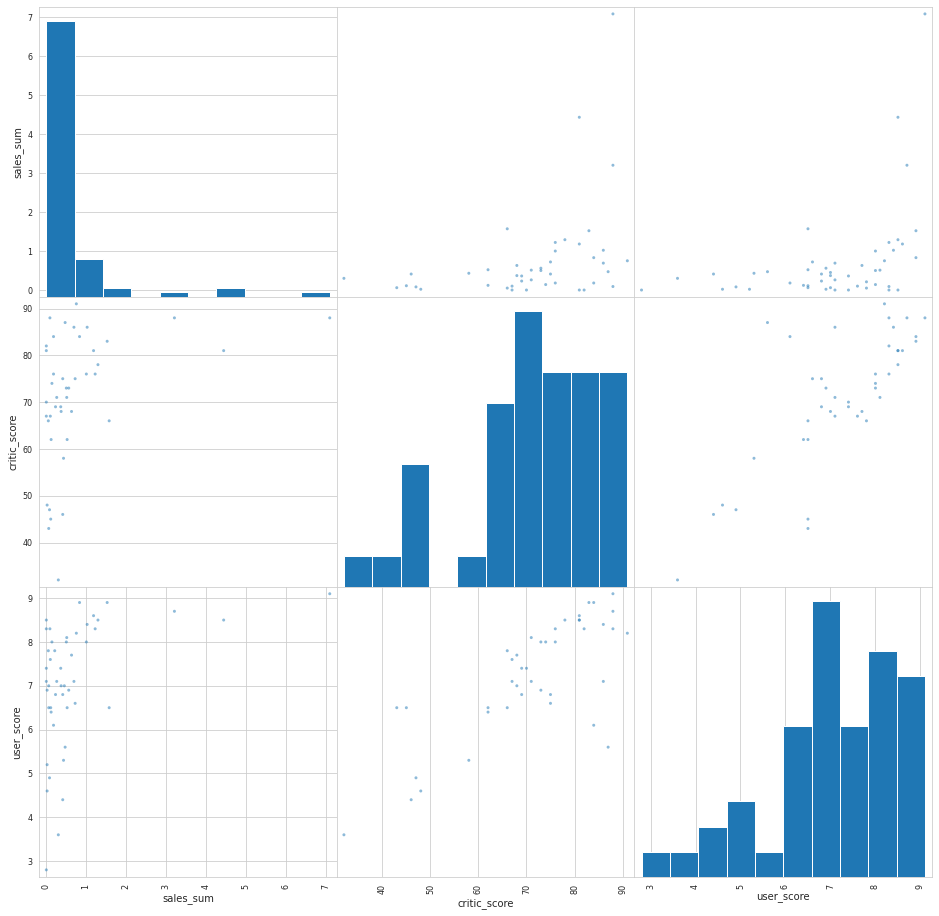

In [59]:
pd.plotting.scatter_matrix(wii_u_info, figsize = (16, 16))
plt.show()

Вывод, который был сделан в предыдущем пункте можно распротранить на все остальные консоли, за ислкючением WiiU и 3DS.

У данных платформ оказалась более значимой корреляция между отзывами игроков и общими продажами игр. Думаю, что так происходит, потому что данные консоли явлюятся более нисшевым и менее популярным сегментом. Критики могу более прохладно относиться к проектам на данных платформах. А энтузиасты в то же время, смогут по достоинству оценить продукты на этих платформах.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [60]:
genre_stat = actual_data.pivot_table(index = 'genre', values = 'name', aggfunc = 'count')
genre_stat = genre_stat.sort_values('name', ascending = False)
genre_stat = genre_stat.reset_index().rename_axis(None, axis=1)
genre_stat = genre_stat.rename(columns = {'name': 'count'})
genre_stat.head()

,genre,count
0,Action,619
1,Role-Playing,221
2,Adventure,185
3,Sports,161
4,Shooter,128


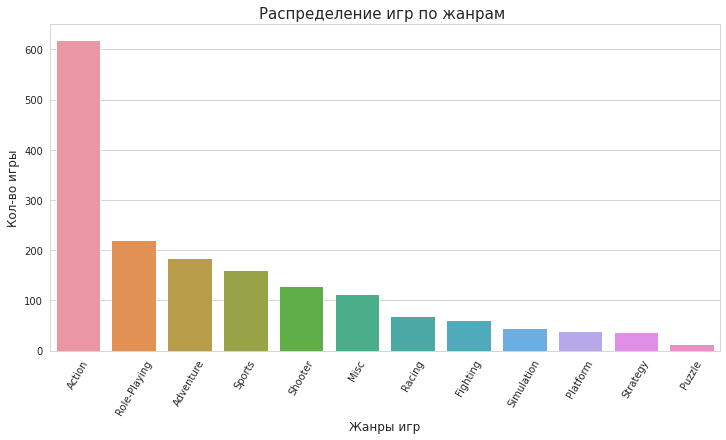

In [61]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_stat, x='genre', y='count')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Кол-во игры',fontsize=12)
plt.xticks(rotation = 60)
plt.show()

Самым распостранным жанром является жанр Action. За ним идет RPG и 3 строчку лидров занимает жанр Adventure

In [62]:
genre_sales = actual_data.pivot_table(index = 'genre', values = 'sales_sum', aggfunc = 'mean')
genre_sales = genre_sales.sort_values('sales_sum', ascending = False)
genre_sales = genre_sales.reset_index().rename_axis(None, axis=1)
genre_sales.head()

,genre,sales_sum
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005


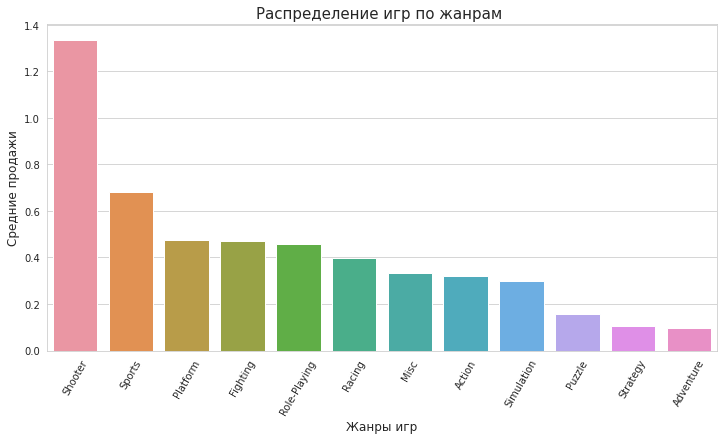

In [63]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_sales, x='genre', y='sales_sum')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Средние продажи',fontsize=12)
plt.xticks(rotation = 60)
plt.show()

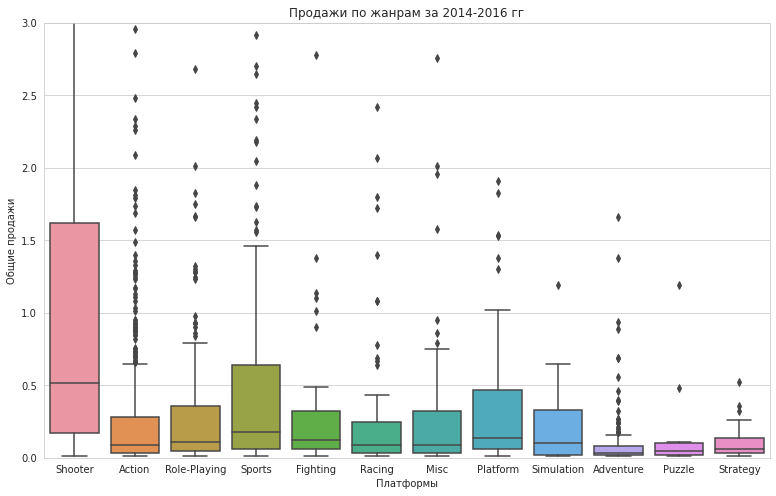

In [64]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_data, y = 'sales_sum', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

Продажи распределенные по жанрам немного отличаются от распределения по кол-ву игр. 

Самыми прибыльными жанрами, который стабильно приносит доход являются жанры: Shooter, Sports, Platform

Жанры с самыми низкими средними продажами являются: Adventure, Strategy, Puzzle

## Составьте портрет пользователя каждого региона

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала подготовим данные

In [65]:
eu_actual_data = actual_data.query('eu_sales > 0')
eu_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 31 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1067 non-null   object 
 1   platform         1067 non-null   object 
 2   year_of_release  1067 non-null   int64  
 3   genre            1067 non-null   object 
 4   na_sales         1067 non-null   float64
 5   eu_sales         1067 non-null   float64
 6   jp_sales         1067 non-null   float64
 7   other_sales      1067 non-null   float64
 8   critic_score     626 non-null    Int64  
 9   user_score       774 non-null    float64
 10  rating           1067 non-null   object 
 11  sales_sum        1067 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 109.4+ KB


In [66]:
na_actual_data = actual_data.query('na_sales > 0')
na_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 31 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             981 non-null    object 
 1   platform         981 non-null    object 
 2   year_of_release  981 non-null    int64  
 3   genre            981 non-null    object 
 4   na_sales         981 non-null    float64
 5   eu_sales         981 non-null    float64
 6   jp_sales         981 non-null    float64
 7   other_sales      981 non-null    float64
 8   critic_score     571 non-null    Int64  
 9   user_score       713 non-null    float64
 10  rating           981 non-null    object 
 11  sales_sum        981 non-null    float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 100.6+ KB


In [67]:
jp_actual_data = actual_data.query('jp_sales > 0')
jp_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             873 non-null    object 
 1   platform         873 non-null    object 
 2   year_of_release  873 non-null    int64  
 3   genre            873 non-null    object 
 4   na_sales         873 non-null    float64
 5   eu_sales         873 non-null    float64
 6   jp_sales         873 non-null    float64
 7   other_sales      873 non-null    float64
 8   critic_score     278 non-null    Int64  
 9   user_score       327 non-null    float64
 10  rating           873 non-null    object 
 11  sales_sum        873 non-null    float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 89.5+ KB


Определим самые популярные платформы для каждого региона.

In [68]:
eu_best_platform = eu_actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_best_platform.head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


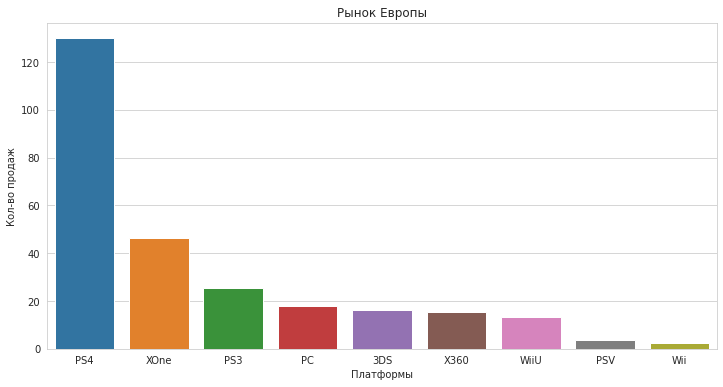

In [69]:

sns.barplot(data=eu_best_platform.reset_index(), x='platform', y='eu_sales')
plt.title('Рынок Европы')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.show()

In [70]:
na_best_platform = na_actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_best_platform.head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


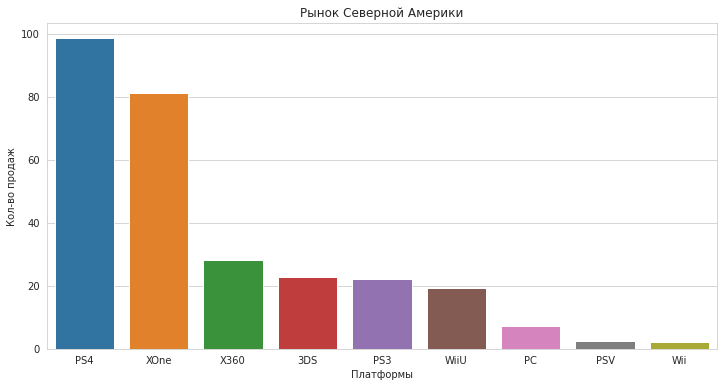

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(data=na_best_platform.reset_index(), x='platform', y='na_sales')
plt.title('Рынок Северной Америки')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.show()

In [72]:
jp_best_platform = jp_actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_best_platform.head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


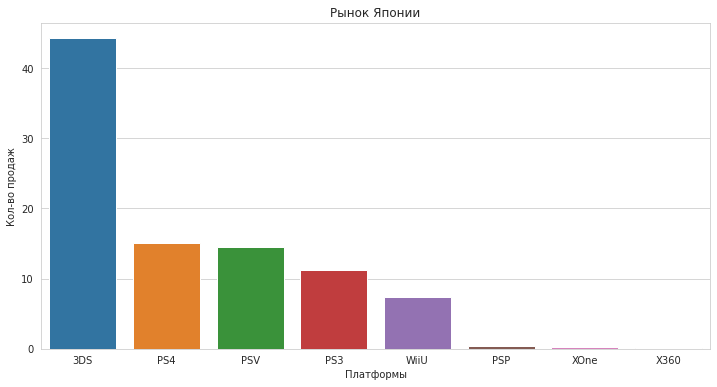

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(data=jp_best_platform.reset_index(), x='platform', y='jp_sales')
plt.title('Рынок Японии')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.show()

Топ-5 платформ европейского рынка:
- PS4
- XOne
- PS3
- PC
- 3DS

Топ-5 платформ рынка Северной Америки:
- PS4
- XOne
- X360
- 3DS
- PS3

Топ-5 платформ японского рынка:
- 3DS
- PS4
- PSV
- PS3
- WiiU

На данный фактор конечно же влияет рекламная политика команиий относительно регионов. Если в Америке одним из ключевых лидеров рынка является XOne (Производитель MicroSoft, американская компания), то в лидерами японского рынка являются исключительно японские компании. 

В европейском рынке значимую популярность показывает консоль PS4, по сравнению со всеми остальными. Можно это связать с успешностью консоли, как игрового устройства.

Определим популярные жанры по регионам.

In [74]:
eu_best_platform = eu_actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_best_platform.head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


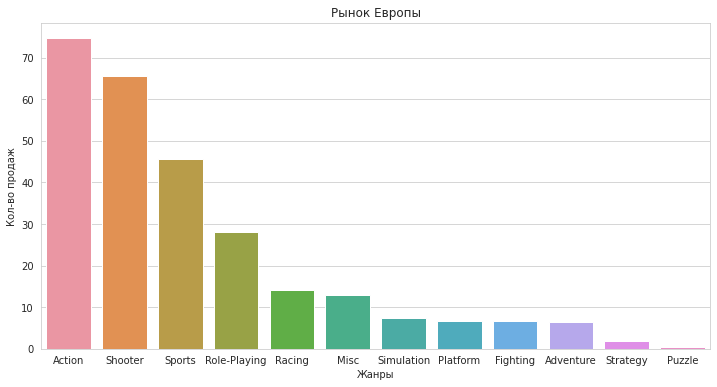

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(data=eu_best_platform.reset_index(), x='genre', y='eu_sales')
plt.title('Рынок Европы')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.show()

In [76]:
na_best_platform = na_actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_best_platform.head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


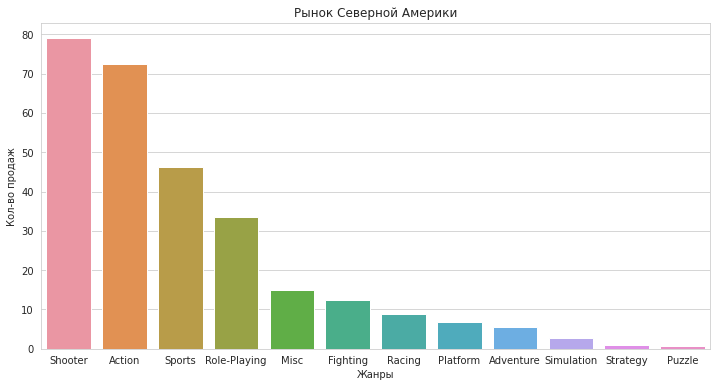

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=na_best_platform.reset_index(), x='genre', y='na_sales')
plt.title('Рынок Северной Америки')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.show()

In [78]:
jp_best_platform = jp_actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_best_platform.head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


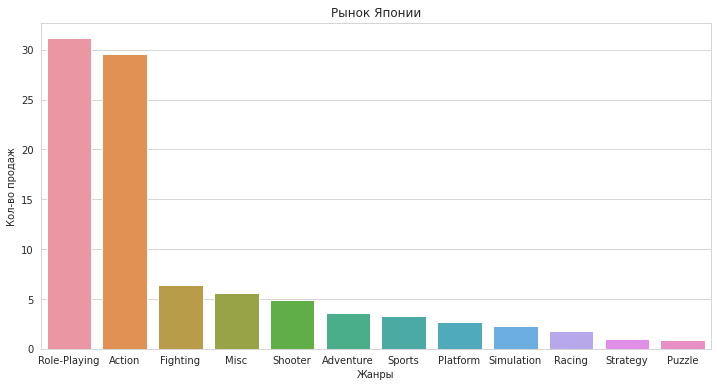

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(data=jp_best_platform.reset_index(), x='genre', y='jp_sales')
plt.title('Рынок Японии')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.show()

Видно, что ТОПы жанров в европейском рынке и в рынке Серверной Америки практически идентичны, за исключением последних позиций. На это влиет в целом популярность данных жанров и выходы значимых игр в данном жанре, которые увеличивают его востребованность. Можно так же отметить, что игры в жанре Action, Shooter и Sports очень часто включают в себя возможность мультплеера(совместная сетевая игра), которая может удерживать в себе игроков на достаточно долго время

Популярность жанра Role-Playing в японском регионе можно объяснить выходом культовых игр в данном жанре, которые создали разработчики из Японии. Но так же видим, что жанр Action, который наиболее популярен в других регионах, в японском регионе занимает топ-2 по популярности, что говорит лишь о высокой популярности и востребованности данного жанра в мире.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [80]:
eu_best_platform = eu_actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_best_platform

,eu_sales
rating,
M,93.44
Not_found,58.95
E,58.06
T,34.07
E10+,26.16


In [81]:
na_best_platform = na_actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_best_platform

,na_sales
rating,
M,96.42
Not_found,64.72
E,50.74
T,38.95
E10+,33.23


In [82]:
jp_best_platform = jp_actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_best_platform

,jp_sales
rating,
Not_found,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Очень заметно, что на рынке Европы и Северной Америки наиболее успешны игры с рейтингом 17+. Значит, что игры там ореинтированы на более взрослую аудиторию.

Японский рынок наиболее всего ореинтируется на аудиторию детей и подростков. Японские разработчики известны своей культурой разработки игр для всей семьи, поэтому такие результаты достаточно закономерны

## Проверьте гипотезы.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC  отличаются между собой.

Подготовим данные

In [83]:
user_score_pc = actual_data[actual_data['platform'] == 'PC']['user_score'].dropna()
user_score_xone = actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()

In [84]:
alpha = 0.5

results = st.ttest_ind(user_score_pc, user_score_xone)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, поэтому мы можем считать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

## Общий вывод

**Шаг 1.** Был загружен файл с необходимой информацией о продажах игр. После загрузки я изучил данные и составил первичный план по их обработке

**Шаг 2.** Я привел названия столбцов к нужном виду, привел типы данных к корректному виду во избежание некорректных расчетов и ошибок. После чего мне предстояло избавиться от дубликатов и обрабоать попуски. Проишлось оставить пустые значения в полях: critic_score, user_score и rating для проведения наиболее качетсвенного и подробного исследования. Так же, я создал столбец, в котором посчитал общемировые продажи игр. Это поле в дальнейшем пригодилось в исследовании

**Шаг 3.** На данном этапе мне предстояло произвести исследование данных. Хочется отметить все ключевые выводы сделанные мной на данном шаге: 

- Нет смысла рассматривать все периоды продаж игр, т.к. игровая индустрия пережила уже несколько эпох. Поэтому стоит рассматривать только актуальные данные
- Новые поколения платформ сменяют старые поколения платформ за примерный период 5-7 лет. 
- Актуальными данными можно считать данные за период начиная с 2013 года.
- Платформы PS4 и XBOX One на данным момент являются флагманами игровой индустрии и еще не пережили пик своей популярности. Судя, по предыдущим данным он предстоит им в 2017-2018 году.
- Можно пронаблюдать, что отзовы критиков и отзывы игроков об играх чаще всего совпадает и имеют значимаю корреляцию.
- Самым распостранным жанром является жанр Action. За ним идет RPG и 3 строчку лидров занимает жанр Adventure. 
- Самыми прибыльными жанрами являются жанры: Shooter, Sports, Platform.
- Жанры с самыми низкими средними продажами являются жанры: Puzzle, Strategy, Adventure.

**Шаг 4.** На данном шаге я составлял портерт пользователя разных рынков. Можно сделать следующие выводы:
- Игрок европейского рынка примерно в равной степени предпочитает консоли PS4, XOne, PS3. Любиыми жанрами данных игроков явлются Action, Shooter, Sports. Игроки данного рынка больше предпочитают игры с высоким возрастным рейтингом (17+)
- Игрок американского рынка сильно больше остальных так же предпочитает консоль PS4, но с XOne не сильно отсатат по продажам игр на данном рынке. XOne занимает второе место, а третье место зание X360. Любимыми жанрами данных игроков так же явлются Action, Shooter, Sports. И игроки североамериканского рынка так же больше предпочитают игры с высоким возрастным рейтингом (17+).
- Игроки японского рынка сильнее всех остальных предпочитают 3DS, PS4, PSV. Можно отметить, что в Японии очень хорошо развито направление портативного гейминга. Любимыми жанрами игроков из Японии являются RPG, Action, Fighting. Японский рынок ореинтирован на более широкую область аудитории. Популярны игры для подростков, детей и всей семьи.

**Шаг 5.** На данном шаге мне предстояло проверить две гипотезы. Выведу результаты:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Данная гипотезу не удалось опровергнуть. 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Данную гипотезу удалось подтвердить.


Общие рекомендации по кампании на 2017 год:

- В следующем году ожидается пик встребованность консолей нового поколения. Игры на современные платформы будут покупать чаще остальных
- Советую обратить внимание на жанры Action, Shooter, Sport и RPG. Они пользуются заметной популярностью среди остальных жанров.
- Стоит обращать внимание на то, как отзываются критики об играх. Если критики хвалят игру, очень вероятно, она будет пользоваться успехом и покупателей
- Платформа ПК будет оставаться всегда, ведь она развивается одновременно со всей игровой индустрией. Советую обращать внимание на игры, выходящие на ПК.